# CAPSTONE 3: TRADING with ML

In [1]:
# import libraries and packages
import os
import sys
module_path = os.path.abspath(os.path.join(r'C:\Users\matmi\Documents\Trading_w_ML_Capstone_3')) # or the path to your source code
sys.path.insert(0, module_path)

import pandas as pd
import numpy as np

from typing import List, Dict, Tuple, Callable, NewType, Any
from collections import OrderedDict, defaultdict

import datetime
import sklearn
import matplotlib.pyplot as plt

import technical_indicators

In [2]:
# import necessary data from .csv file for EDA and testing a model

def load_stock_data(file_path: str="C:/Users/matmi/OneDrive/Documents/Algorithmic Trading Github/algorithmic-trading-with-python/data/eod/", 
                    ticker: str="AWU"):
    df = pd.read_csv(file_path + ticker + ".csv", parse_dates=['date'], index_col='date')
    return df

In [4]:
# import necessary data for EDA and testing a model

df_AWU = load_stock_data(ticker="AWU")
df_AWU.head()

,open,close,low,high,volume
date,,,,,
2010-01-04,193.94,191.70,190.63,195.51,968029
2010-01-05,191.02,188.17,186.99,192.42,1427075
2010-01-06,187.17,186.50,185.10,190.07,879014
2010-01-07,185.03,185.19,183.63,186.64,1003719
2010-01-08,184.67,187.02,182.78,187.27,804716


In [5]:
df_AWU.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2516 non-null   float64
 1   close   2516 non-null   float64
 2   low     2516 non-null   float64
 3   high    2516 non-null   float64
 4   volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [6]:
df_AWU.describe()

,open,close,low,high,volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,254.351391,254.546626,251.383895,257.500000,7.856500e+05
std,69.229194,69.259165,68.459783,69.976355,5.876934e+05
min,132.870000,131.840000,129.980000,134.040000,9.875100e+04
25%,204.817500,204.630000,202.387500,207.307500,4.386460e+05
50%,242.465000,243.185000,240.120000,245.400000,6.265080e+05
75%,288.092500,287.757500,284.820000,291.005000,9.487340e+05
max,471.690000,469.930000,466.800000,472.960000,8.767575e+06


### Return Series

- Series of price changes on an asset, portfolio, or equity curve.
- Typically, the return series refers to a series of percentage returns, but can refer to series of dollar or logarithmic returns
    - ***Insert formula here***

In [7]:
# Calculate the return series using pandas

def calc_return_series_pd(series: pd.Series) -> pd.Series:
    """
    Calculates the return series of a time series
    The first value will always be NaN
    Output series returns the index of the input series
    """
    shifted_series = series.shift(1, axis=0)
    return series / shifted_series - 1

### Log Return Series

- Commonly used to take advantage of their unique mathematical principles
- ***Insert formula here***
- Log Returns have following relationship with price series
- ***Insert formula here***

In [8]:
def calc_log_return_series(series: pd.Series) -> pd.Series:
    """
    Same as calculate_return_series, but with log returns
    """
    shifted_series = series.shift(1, axis=0)
    return pd.Series(np.log(series / shifted_series))

In [9]:
# Calculate annualized volatility

def get_years_past(series: pd.Series) -> float:
    """
    Calculate the years past according to the index of the series for functions that require annualization
    """
    
    start_date = series.index[0]
    end_date = series.index[-1]
    
    # Note: Had to convert the TimeDelta by pd.to_timedelta(1, unit='D') in order to obtain an integer for years_past
    return ((end_date - start_date) / 365.25) / pd.to_timedelta(1, unit='D')

def calc_annualized_volatility(return_series: pd.Series) -> float:
    """
    Calculates annualized volatility for a date-indexed return series.
    Works for any interval of date-indexed prices and returns.
    """
    
    years_past = get_years_past(return_series)
    entries_per_year = return_series.shape[0] / years_past
    
    return return_series.std() * np.sqrt(entries_per_year)

In [10]:
AWU_log_return_series = calc_log_return_series(df_AWU['close'])
AWU_log_return_series.dropna(inplace=True)
AWU_log_return_series.head()

date
2010-01-05   -0.018586
2010-01-06   -0.008915
2010-01-07   -0.007049
2010-01-08    0.009833
2010-01-11   -0.017857
Name: close, dtype: float64

In [11]:
AWU_return_series = calc_return_series_pd(df_AWU['close'])
AWU_return_series.dropna(inplace=True)
AWU_return_series.head()

date
2010-01-05   -0.018414
2010-01-06   -0.008875
2010-01-07   -0.007024
2010-01-08    0.009882
2010-01-11   -0.017699
Name: close, dtype: float64

In [12]:
df_AWU

,open,close,low,high,volume
date,,,,,
2010-01-04,193.94,191.70,190.63,195.51,968029
2010-01-05,191.02,188.17,186.99,192.42,1427075
2010-01-06,187.17,186.50,185.10,190.07,879014
2010-01-07,185.03,185.19,183.63,186.64,1003719
2010-01-08,184.67,187.02,182.78,187.27,804716
...,...,...,...,...,...
2019-12-24,331.06,330.85,328.43,332.91,98751
2019-12-26,331.36,329.05,327.47,333.05,209398
2019-12-27,332.47,325.38,325.16,332.47,225667


# PLOTS

Text(0.5, 1.0, 'AWU shares traded')

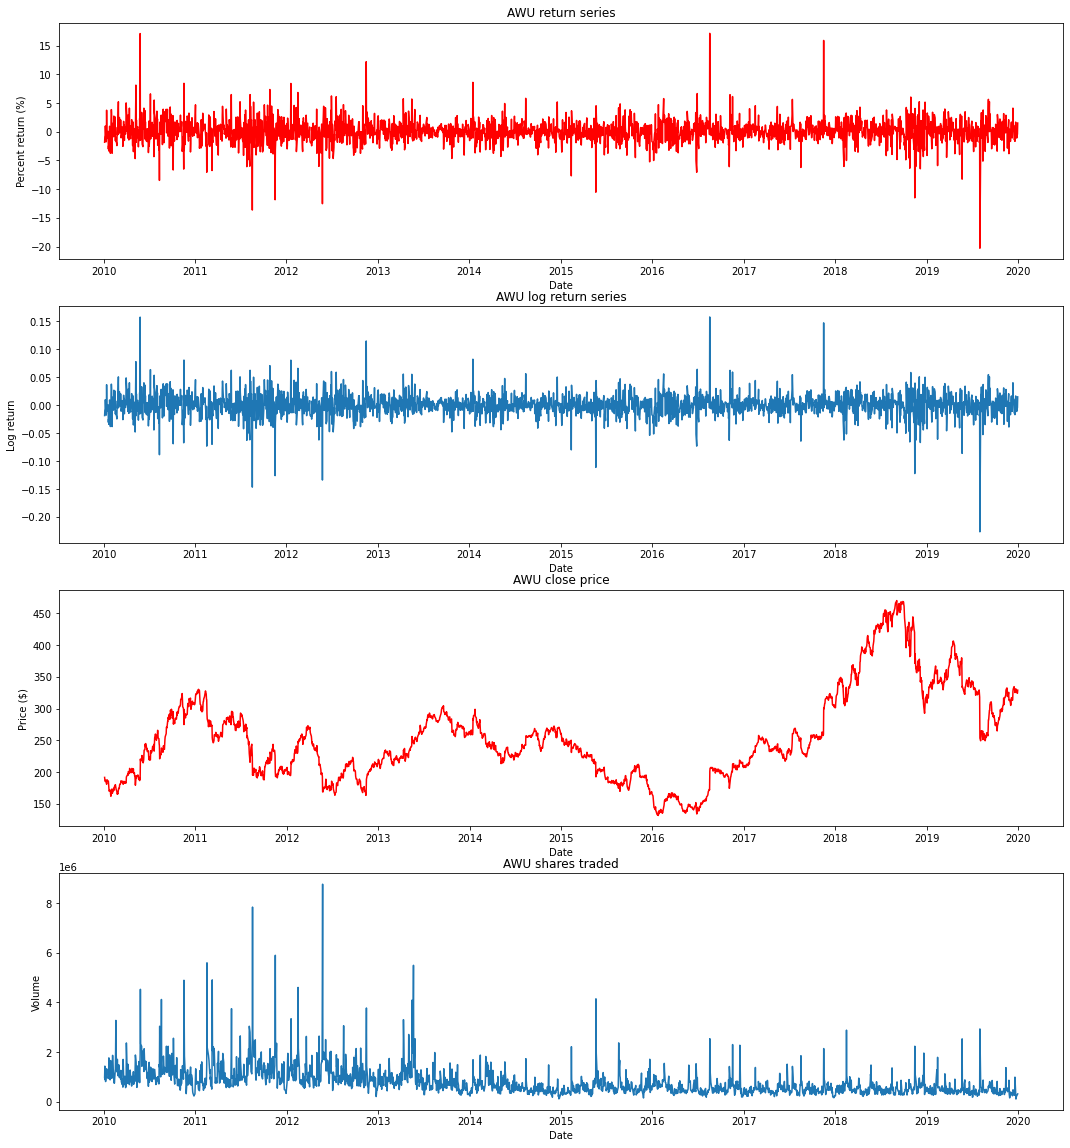

In [13]:
# plot return series, log return series, closing price, volume/shares traded

fig, ax = plt.subplots(4,1, figsize=(18,20))

ax[0].plot(df_AWU.index[1:], AWU_return_series*100, c="Red")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Percent return (%)")
ax[0].set_title("AWU return series")

ax[1].plot(df_AWU.index[1:], AWU_log_return_series)
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Log return")
ax[1].set_title("AWU log return series")

ax[2].plot(df_AWU.index, df_AWU.close, c="Red")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Price ($)")
ax[2].set_title("AWU close price")

ax[3].plot(df_AWU.index, df_AWU.volume)
ax[3].set_xlabel("Date")
ax[3].set_ylabel("Volume")
ax[3].set_title("AWU shares traded")

In [14]:
AWU_log_return_series.mean()

0.00021467726127969634

In [15]:
AWU_return_series.mean()

0.0004297206016033311

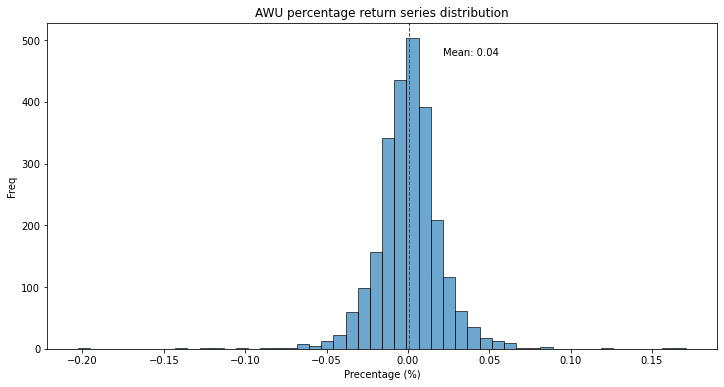

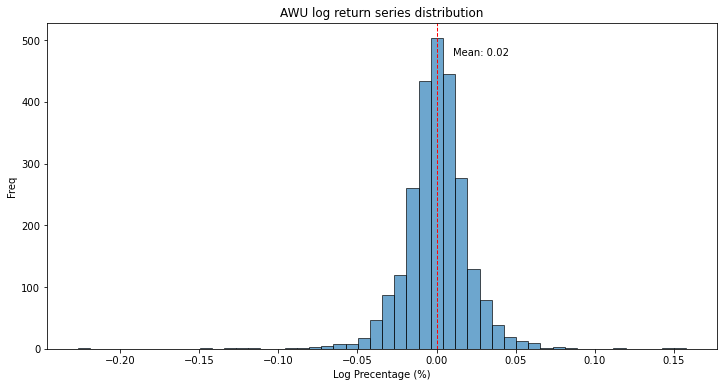

In [16]:
# plot the distribution of the return series and log return series here

plt.figure(figsize=(12,6))
plt.hist(AWU_return_series, bins=50, edgecolor="k", alpha=0.65)
plt.axvline(AWU_return_series.mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(AWU_return_series.mean()*50, max_ylim*0.9, 'Mean: {:.2f}'.format(AWU_return_series.mean()*100))
plt.title("AWU percentage return series distribution")
plt.xlabel("Precentage (%)")
plt.ylabel("Freq")
plt.show()

plt.figure(figsize=(12,6))
plt.hist(AWU_log_return_series, bins=50, edgecolor="k", alpha=0.65)
plt.axvline(AWU_log_return_series.mean(), color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(AWU_log_return_series.mean()*50, max_ylim*0.9, 'Mean: {:.2f}'.format(AWU_log_return_series.mean()*100))
plt.title("AWU log return series distribution")
plt.xlabel("Log Precentage (%)")
plt.ylabel("Freq")
plt.show()

In [17]:
print("The annualized volatility of AWU: ", calc_annualized_volatility(AWU_return_series))

The annualized volatility of AWU:  0.3286556147539905


### Sharpe Ratio

- Most widely used performance metric because of its simplicity.
- In order to measure risk-adjusted return, we divide the return by a measure of risk.
- In this case, risk is an analogue of volatility.
- ***Insert formula here*** (r_a - r_b) / sigma_r
- r_a = annualized return on portfolio | r_b = annualized benchmark rate | sigma_r = annualized volatility of percentage returns

##### CAGR - Compounded Annual Growth Rate

- Sharpe ratio can be calculated over an equity curve, portfolio, or single asset
- ***Insert formula here***
- r_a = CAGR = (E_T/e_0)^1/k - 1
- T = time spanned | k = T/252 (for daily returns) 

In [18]:
# calculate compounded annual growth rate

def calc_cagr(series: pd.Series) -> float:
    """
    Calculate compunded annual growth rate
    """
    value_factor = series.iloc[-1] / series.iloc[0]
    #value_factor = float(value_factor)
    years_past = get_years_past(series)
    
    return (value_factor ** (1 / years_past)) - 1

In [19]:
print("The compunded annual growth rate of AWU: ", calc_cagr(df_AWU['close']))

The compunded annual growth rate of AWU:  0.055545750640820346


In [20]:
def calc_sharpe_ratio(price_series: pd.Series, benchmark_rate: float=0) -> float:
    """
    Calculates the sharpe ratio given a price series. Defaults to benchmark_rate of zero
    """
    cagr = calc_cagr(price_series)
    return_series = calc_return_series_pd(price_series)
    volatility = calc_annualized_volatility(return_series)
    return (cagr - benchmark_rate) / volatility

In [21]:
print("The Sharpe Ration of AWU: ", calc_sharpe_ratio(price_series=df_AWU['close']))

The Sharpe Ration of AWU:  0.16899855586625828


In [22]:
df_CUU = load_stock_data(ticker="CUU")
df_BMG = load_stock_data(ticker="BMG")

- ***Insert Plots Here***
- Should compare AWU, CUU and BMG 
- CUU will have a lower Sharpe Ratio than BMG despite returning more overall. This is evidence that CUU had higher volatility over that period than BMG

### Sortino Ratio

- The Sortino Ratio is an attempt at an improvement on the Sharpe Ratio
- The Sharpe Ratio penalizes large upward and downward price changes because of its simple volatility calc
- The Sortino Ratio only penalizes downward swings

- ***Insert formula here*** (r_a - r_b) / sigma_d

- sigma_d represents downside deviation of the return series, given the benchmark rate
- There is no built-in pandas function for the downside deviation introduced by the Sortino Ratio

- ***Insert formula here for downside deviation***

- As seen in the formula if the return is greater than the benchmark rate, then 0 is added instead, and therefore the volatility is only calculate on negative returns over the period
    - Note: It seems a better way to amend the Sharpe ratio might be to set specific thresholds based on a statistical measure from the benchmark rate ??

In [23]:
def calc_annualized_downside_deviation(return_series: pd.Series, benchmark_rate: float=0) -> float:
    """
    Calculates the downside deviation for use in the Sortino Ratio.
    
    Benchmark rate is assumed to be annualized. It will be adjusted according to the number of periods per year seen in the data.
    """
    
    # For both de-annualizing the benchmark rate and annualizing result
    years_past = get_years_past(return_series)
    entries_per_year = return_series.shape[0] / years_past
    
    adjusted_benchmark_rate = ((1 + benchmark_rate) ** (1/entries_per_year)) - 1
    
    downside_series = adjusted_benchmark_rate - return_series
    downside_sum_of_squares = (downside_series[downside_series > 0] ** 2).sum()
    denominator = return_series.shape[0] - 1
    downside_deviation = np.sqrt(downside_sum_of_squares / denominator)
    
    return downside_deviation * np.sqrt(entries_per_year)

In [24]:
calc_annualized_downside_deviation(AWU_return_series)

0.22961502598842032

In [25]:
def calc_sortino_ratio(price_series: pd.Series, benchmark_rate: float=0) -> float:
    """
    Calculates the sortino ratio
    """
    
    cagr = calc_cagr(price_series)
    return_series = calc_return_series_pd(price_series)
    downside_deviation = calc_annualized_downside_deviation(return_series)
    
    return (cagr - benchmark_rate) / downside_deviation

In [26]:
calc_sortino_ratio(price_series = df_AWU['close'])

0.24194135177871803

In [27]:
df_AWU['close'][0]

191.7

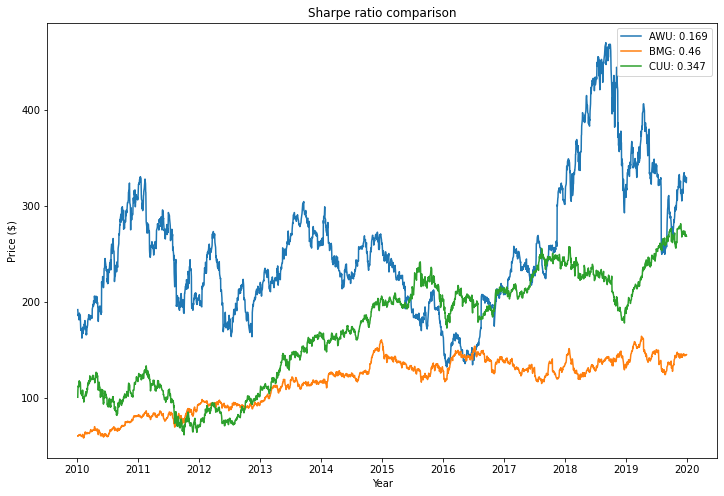

In [28]:
# plot sharpe ratio
AWU_sharpe = calc_sharpe_ratio(price_series=df_AWU['close'])
BMG_sharpe = calc_sharpe_ratio(price_series=df_BMG['close'])
CUU_sharpe = calc_sharpe_ratio(price_series=df_CUU['close'])

plt.figure(figsize=(12,8))
plt.plot(df_AWU.index, df_AWU['close'], label = "AWU: %s" %round(AWU_sharpe, 3))
plt.plot(df_BMG.index, df_BMG['close'], label = "BMG: %s" %round(BMG_sharpe, 3))
plt.plot(df_CUU.index, df_CUU['close'], label = "CUU: %s" %round(CUU_sharpe, 3))
plt.xlabel("Year")
plt.ylabel("Price ($)")
plt.title("Sharpe ratio comparison")
plt.legend()
plt.show()

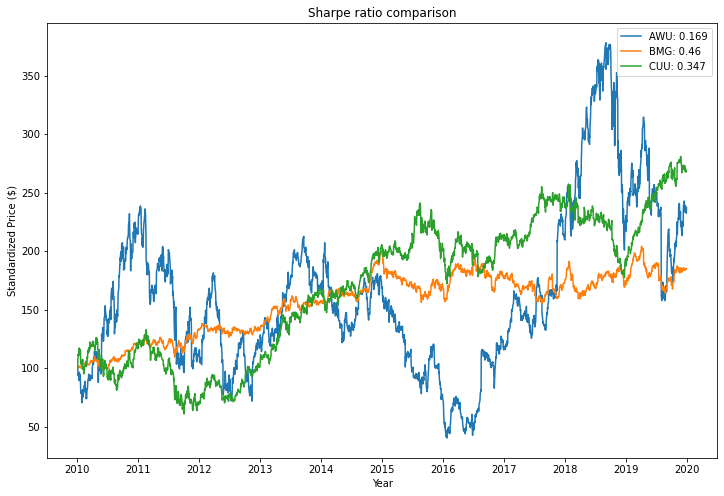

In [29]:
# plot sharpe ratio
AWU_sharpe = calc_sharpe_ratio(price_series=df_AWU['close'])
BMG_sharpe = calc_sharpe_ratio(price_series=df_BMG['close'])
CUU_sharpe = calc_sharpe_ratio(price_series=df_CUU['close'])

plt.figure(figsize=(12,8))
plt.plot(df_AWU.index, df_AWU['close'] + (100 - df_AWU['close'][0]), label = "AWU: %s" %round(AWU_sharpe, 3))
plt.plot(df_BMG.index, df_BMG['close'] + (100 - df_BMG['close'][0]), label = "BMG: %s" %round(BMG_sharpe, 3))
plt.plot(df_CUU.index, df_CUU['close'] + (100 - df_CUU['close'][0]), label = "CUU: %s" %round(CUU_sharpe, 3))
plt.xlabel("Year")
plt.ylabel("Standardized Price ($)")
plt.title("Sharpe ratio comparison")
plt.legend()
plt.show()

# TECHNICAL INDICATORS
- Technical indicators attempt to uncover patterns in market behavior using market activity to produce trading signals
- Technical indicators are useful in so much as they are able to produce statistically relevant returns; we will explore whether the technical indicators can do so in future chapters

### Rolling Functions and Algorithms

- Technical indicators are generally rolling functions that return a data structure equal in shape to the input
- A simple trailing window of length *m* will supply entries of *y_i* from *t - m - 1* through *t* at time *t* of some function
- More complex windows such as triangular or Gaussian will apply weights to each data point within the time interval

#### Simple Moving Average
- Simple yet relevant in financial analysis is the SMA
- Simply the average of the elements within the period *m*
- ***Insert formula here***

In [30]:
def calc_sma(series: pd.Series, n: int=20) -> pd.Series:
    """
    Calculates the simple moving average with pandas
    """
    return series.rolling(n).mean()

### Oscillators

- Oscillators commonly have a relationship to the first derivative of an asset's underlying price history and often appear under the price history in financial charting software
- Popular oscillators are the Moving Average Convergence Divergence (MACD) and the Relative Strength Index (RSI)

#### MACD
- MACD is the difference between two moving averages at different legnths
- As long as the stock price does not remain stable in a perfectly straight line the moving averages will tend to converge and diverge
- Thus, the difference will oscillate between negative and positive values
- ***Insert formula here***


In [31]:
def calculate_rsi(price_ser: pd.Series, window: int):
    """
    Calculate the rolling relative strength index using exponentially weighted average 
    alpha = 1/3 should be reviewed; must pass com, span, halflife or alpha into .ewm() method
    """
    price_delta = price_ser.diff(1)
    
    gain_ser = price_delta.clip(lower=0)
    loss_ser = price_delta.clip(upper=0)

    #avg_gain_ser = gain_ser.rolling(window).mean()
    #avg_loss_ser = loss_ser.rolling(window).mean()
    avg_gain_ser = gain_ser.ewm(alpha=1/3, min_periods=window).mean()
    avg_loss_ser = loss_ser.ewm(alpha=1/3, min_periods=window).mean()

    rs_ser = avg_gain_ser / abs(avg_loss_ser)
    rsi_ser = 100 - (100 / (1 + rs_ser))

    return price_delta, gain_ser, loss_ser, avg_gain_ser, avg_loss_ser, rs_ser, rsi_ser

In [32]:
df = pd.DataFrame()

df_AWU['price_delta'], df_AWU['gain_ser'], df_AWU['loss_ser'], df_AWU['avg_gain_ser'], df_AWU['avg_loss_ser'], df_AWU['rs_ser'], df_AWU['rsi_ser'] = calculate_rsi(df_AWU['close'], 20)

In [33]:
df_AWU.dropna(inplace=True)
df_AWU.head()

,open,close,low,high,volume,price_delta,gain_ser,loss_ser,avg_gain_ser,avg_loss_ser,rs_ser,rsi_ser
date,,,,,,,,,,,,
2010-02-02,168.67,173.31,167.89,174.21,1480776,5.09,5.09,0.00,3.142242,-1.353602,2.321393,69.892147
2010-02-03,172.30,173.31,171.30,174.09,959287,0.00,0.00,0.00,2.094618,-0.902311,2.321393,69.892147
2010-02-04,171.54,166.80,166.52,172.72,1613362,-6.51,0.00,-6.51,1.396319,-2.771790,0.503760,33.500048
2010-02-05,167.05,168.77,163.71,169.27,1861669,1.97,1.97,0.00,1.587563,-1.847778,0.859174,46.212672
2010-02-08,170.24,170.35,168.56,173.42,1200608,1.58,1.58,0.00,1.585042,-1.231815,1.286753,56.269865


In [34]:
df_AWU.loc['prediction'] = df_AWU.loc[(df_AWU['price_delta'] < 0), 'prediction'] = 0
df_AWU.loc['prediction'] = df_AWU.loc[(df_AWU['price_delta'] > 0), 'prediction'] = 1
df_AWU.loc['prediction'] = df_AWU.loc[(df_AWU['price_delta'] == 0), 'prediction'] = 0

In [35]:
df_AWU.drop(index=['prediction'], inplace=True)

In [36]:
df_AWU['prediction'] = df_AWU['prediction'].apply(int)
df_AWU.head()

,open,close,low,high,volume,price_delta,gain_ser,loss_ser,avg_gain_ser,avg_loss_ser,rs_ser,rsi_ser,prediction
date,,,,,,,,,,,,,
2010-02-02 00:00:00,168.67,173.31,167.89,174.21,1480776,5.09,5.09,0.00,3.142242,-1.353602,2.321393,69.892147,1
2010-02-03 00:00:00,172.30,173.31,171.30,174.09,959287,0.00,0.00,0.00,2.094618,-0.902311,2.321393,69.892147,0
2010-02-04 00:00:00,171.54,166.80,166.52,172.72,1613362,-6.51,0.00,-6.51,1.396319,-2.771790,0.503760,33.500048,0
2010-02-05 00:00:00,167.05,168.77,163.71,169.27,1861669,1.97,1.97,0.00,1.587563,-1.847778,0.859174,46.212672,1
2010-02-08 00:00:00,170.24,170.35,168.56,173.42,1200608,1.58,1.58,0.00,1.585042,-1.231815,1.286753,56.269865,1


In [37]:
def calc_macd(series: pd.Series, n1: int=5, n2: int=34) -> pd.Series:
    """
    Calculate the MACD oscillator, given a short moving avg of length n1 and long moving avg of length n2
    """
    assert n1 < n2, f'n1 must be less than n2'
    return calc_sma(series, n1) - calc_sma(series, n2)

In [72]:
df_AWU['MACD'] = calc_macd(df_AWU['close'])

- We will determine if the technical signals or indicators provide any value to investors, using simulation methods later
- The MACD indicator is traditionally used as a momentum-based entry signal
    - Buy signals occur when the MACD line crosses from below zero to above zero
    - Sell signals occur in the opposite direction
- It is momentum-based in the sense that, to move across the zero line, there has to be some short-term directional momentum in the asset price
- The opposite of a momentum-based indicator is a reversal-based indicator

### Overlays

- The second major class of indicators, overlays are generally related to the stock price in both units and position
- These indicators typically appear on the same chart as the price history 
- Popular indicators include the Bollinger Bands and the Ichimoku Cloud

#### Bollinger Bands
- Bollinger Bands combine moving avgs with an alternative measure of volatility to create a 3 part overlay
- Three bands: Upper, Middle and Lower
- The middle band is typically 20-day simple moving avg, and the upper/lower are +/- a rolling 20-day std of the middle

In [38]:
def calc_smstd(series: pd.Series, n: int=20) -> pd.Series:
    """
    Calculates the simple moving standard deviation of a series
    """
    return series.rolling(n).std()

In [39]:
def calc_bollinger_bands(series: pd.Series, n: int=20) -> pd.DataFrame:
    """
    Calculates the bollinger bands and returns them as a dataframe
    """
    
    sma = calc_sma(series, n)
    std = calc_smstd(series, n)
    
    return pd.DataFrame({'middle': sma, 'upper': sma + 2 * std, 'lower': sma - 2 *std})

- Notice the std is take against the price series as opposed to the return series, as is typical when discussing volatility
- Taken against the price series only has statistical relevance when done over very short periods
- ***Insert plot of Bollinger Bands overlaid on the price series***
- The Bollinger Bands provide a pretense for the reversal method mentioned previously; if the price series exceeds the upper band, then a reversal signal to sell is triggered and if it descends below the lower band a buy signal is triggered

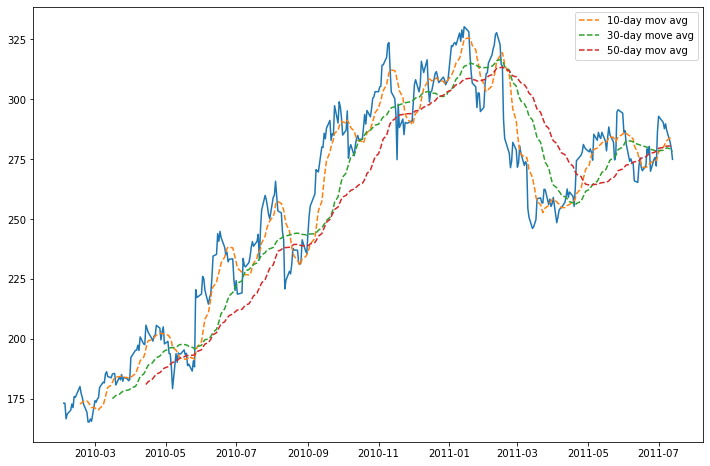

In [40]:
# plot moving averages at different windows, return series, and volatility
plt.figure(figsize=(12,8))
plt.plot(df_AWU.index[:365], df_AWU['close'][:365])
plt.plot(df_AWU.index[:365], calc_sma(df_AWU['close'][:365], 10), linestyle='dashed', label='10-day mov avg')
plt.plot(df_AWU.index[:365], calc_sma(df_AWU['close'][:365], 30), linestyle='dashed', label='30-day move avg')
plt.plot(df_AWU.index[:365], calc_sma(df_AWU['close'][:365], 50), linestyle='dashed', label='50-day mov avg')
plt.legend()
plt.show()

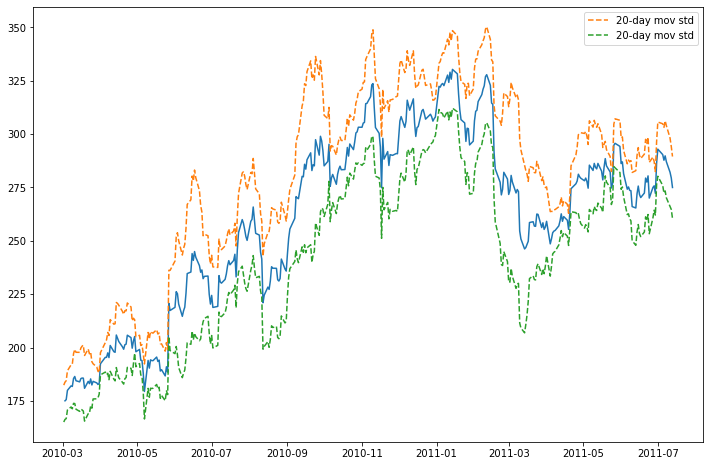

In [41]:
# plot moving averages at different windows, return series, and volatility
plt.figure(figsize=(12,8))
plt.plot(df_AWU.index[20:365], df_AWU['close'][20:365])
plt.plot(df_AWU.index[:365], df_AWU['close'][:365] + calc_smstd(df_AWU['close'][:365], 20)*2, linestyle='dashed', label='20-day mov std')
plt.plot(df_AWU.index[:365], df_AWU['close'][:365] - calc_smstd(df_AWU['close'][:365], 20)*2, linestyle='dashed', label='20-day mov std')
plt.legend()
plt.show()

In [42]:
AWU_boll = calc_bollinger_bands(df_AWU['close'][:365], 20)
AWU_boll.dropna(inplace=True)
AWU_boll.head()

,middle,upper,lower
date,,,
2010-03-02,171.8255,180.466775,163.184225
2010-03-03,171.9110,180.647435,163.174565
2010-03-04,172.0250,180.896754,163.153246
2010-03-05,172.6810,181.860918,163.501082
2010-03-08,173.3440,183.223306,163.464694


In [73]:
df_AWU['middle_boll'], df_AWU['upper_boll'], df_AWU['lower_boll'] = calc_bollinger_bands(df_AWU['close'], 20)['middle'], calc_bollinger_bands(df_AWU['close'], 20)['upper'], calc_bollinger_bands(df_AWU['close'], 20)['lower']

# Stochastic Oscillator

In [54]:
# Calculate the Stochastic Oscillator

def roll_low(ser: pd.Series, n: int=14):
    """
    find the rolling max of the last n days
    """
    
    return ser.rolling(n).min()

In [55]:
def roll_high(ser: pd.Series, n: int=14):
    """
    find the rolling max of the last n days
    """
    
    return ser.rolling(n).max()

In [56]:
def k_percent(ser: pd.Series, n: int=14):
    """
    calculates the stochastic oscillator or k_percent indicator
    """
    
    return 100 * ((ser - roll_low(ser)) / (roll_high(ser) - roll_low(ser)))

# Williams %R

In [64]:
def r_percent(ser:pd.Series, n: int=14):
    """
    calculates the williams r_percent indicator
    """
    
    return 100 * ((roll_high(ser) - ser) / (roll_high(ser) - roll_low(ser)))

# Price Rate of Change

In [76]:
def PROC(ser: pd.Series, n: int=9):
    """
    calculates the price rate of change of the series
    """
    
    return ser.pct_change(periods=n)

In [77]:
df_AWU['PROC'] = PROC(df_AWU['close'], 9)

In [79]:
df_AWU

,open,close,low,high,volume,price_delta,gain_ser,loss_ser,avg_gain_ser,avg_loss_ser,...,lower_boll,upper_boll,middle_boll,k_percent,rolling_low,rolling_high,r_percent,MACD,MACD_EMA9,PROC
date,,,,,,,,,,,,,,,,,,,,,
2010-02-02,168.67,173.31,167.89,174.21,1480776,5.09,5.09,0.00,3.142242,-1.353602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-03,172.30,173.31,171.30,174.09,959287,0.00,0.00,0.00,2.094618,-0.902311,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-04,171.54,166.80,166.52,172.72,1613362,-6.51,0.00,-6.51,1.396319,-2.771790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-05,167.05,168.77,163.71,169.27,1861669,1.97,1.97,0.00,1.587563,-1.847778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-08,170.24,170.35,168.56,173.42,1200608,1.58,1.58,0.00,1.585042,-1.231815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,331.06,330.85,328.43,332.91,98751,0.24,0.24,0.00,1.793414,-1.170867,...,300.312795,340.038205,320.1755,83.994709,311.80,334.48,16.005291,8.804294,9.104728,0.053226
2019-12-26,331.36,329.05,327.47,333.05,209398,-1.80,0.00,-1.80,1.195609,-1.380578,...,301.027152,340.919848,320.9735,74.837813,312.90,334.48,25.162187,8.014941,8.886771,0.006269
2019-12-27,332.47,325.38,325.16,332.47,225667,-3.67,0.00,-3.67,0.797073,-2.143719,...,301.954497,341.253503,321.6040,57.831325,312.90,334.48,42.168675,6.556294,8.420675,-0.015283


In [52]:
df_AWU['rolling_low'] = roll_low(ser=df_AWU['close'], n=14)

In [61]:
df_AWU['rolling_high'] = roll_high(ser=df_AWU['close'], n=14)

In [62]:
df_AWU['k_percent'] = k_percent(ser=df_AWU['close'], n=14)

In [65]:
df_AWU['r_percent'] = r_percent(ser=df_AWU['close'], n=14)

In [74]:
df_AWU['MACD_EMA9'] = df_AWU['MACD'].ewm(span=9).mean()

In [75]:
df_AWU

,open,close,low,high,volume,price_delta,gain_ser,loss_ser,avg_gain_ser,avg_loss_ser,...,prediction,lower_boll,upper_boll,middle_boll,k_percent,rolling_low,rolling_high,r_percent,MACD,MACD_EMA9
date,,,,,,,,,,,,,,,,,,,,,
2010-02-02,168.67,173.31,167.89,174.21,1480776,5.09,5.09,0.00,3.142242,-1.353602,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-03,172.30,173.31,171.30,174.09,959287,0.00,0.00,0.00,2.094618,-0.902311,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-04,171.54,166.80,166.52,172.72,1613362,-6.51,0.00,-6.51,1.396319,-2.771790,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-05,167.05,168.77,163.71,169.27,1861669,1.97,1.97,0.00,1.587563,-1.847778,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-08,170.24,170.35,168.56,173.42,1200608,1.58,1.58,0.00,1.585042,-1.231815,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,331.06,330.85,328.43,332.91,98751,0.24,0.24,0.00,1.793414,-1.170867,...,1,300.312795,340.038205,320.1755,83.994709,311.80,334.48,16.005291,8.804294,9.104728
2019-12-26,331.36,329.05,327.47,333.05,209398,-1.80,0.00,-1.80,1.195609,-1.380578,...,0,301.027152,340.919848,320.9735,74.837813,312.90,334.48,25.162187,8.014941,8.886771
2019-12-27,332.47,325.38,325.16,332.47,225667,-3.67,0.00,-3.67,0.797073,-2.143719,...,0,301.954497,341.253503,321.6040,57.831325,312.90,334.48,42.168675,6.556294,8.420675


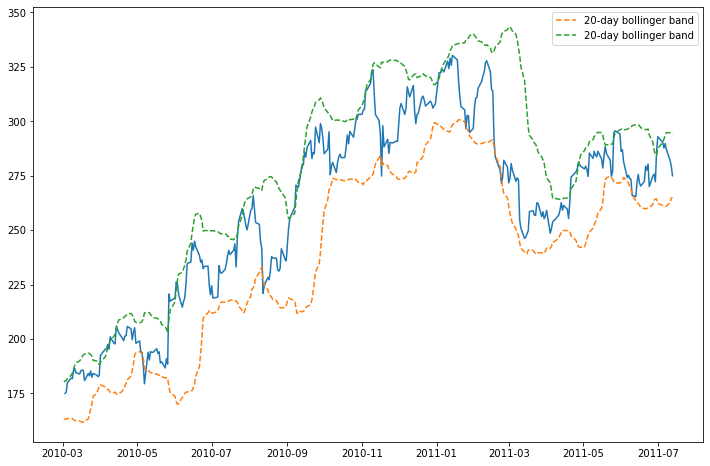

In [44]:
# plot moving averages at different windows, return series, and volatility
plt.figure(figsize=(12,8))
plt.plot(df_AWU.index[20:365], df_AWU['close'][20:365])
plt.plot(df_AWU.index[19:365], AWU_boll.lower, linestyle='dashed', label='20-day bollinger band')
plt.plot(df_AWU.index[19:365], AWU_boll.upper, linestyle='dashed', label='20-day bollinger band')
plt.legend()
plt.show()

# On Balance Volume

In [101]:
def OBV(ser: pd.Series, vol_ser: pd.Series):
    """
    calculate the on balance volume of the close price for the dataframe
    """
    
    return pd.Series(np.where(ser > ser.shift(1), vol_ser, np.where(ser < ser.shift(1), -vol_ser, 0)).cumsum(), index=df_AWU.index)

In [102]:
OBV(df_AWU['close'], df_AWU['volume'])

date
2010-02-02          0
2010-02-03          0
2010-02-04   -1613362
2010-02-05     248307
2010-02-08    1448915
               ...   
2019-12-24    4846761
2019-12-26    4637363
2019-12-27    4411696
2019-12-30    4122430
2019-12-31    4429087
Length: 2496, dtype: int64

In [103]:
df_AWU['OBV'] = OBV(df_AWU['close'], df_AWU['volume'])

In [ ]:
# could also do all stocks combined returns distribution here

In [ ]:
# could also do scatter plots of 5 highest performing stocks

In [ ]:
# find most correlated stocks with target variable

### To-Do:
- Create the target variable
    - The stock will go up or down that day?
    - Created as prediction column ***DONE***
    
    
- Identify which features we want to use and make sure they are all created
    - 'rsi_ser', 'k_percent', 'r_percent', 'MACD', 'price_rate_of_change', 'on_balance_volume'
    - Created all the necessary columns ***DONE***
    
    
- Create model of RandomForestClassifier()
    - Determine days to buy and sell at the end of the day
    
    
- Create a backtesting model to determine performance against the S&P500